Image size (width, height): (4464, 1770)
Resized image size (width, height): (128, 128)


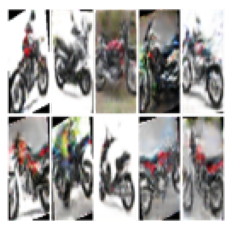

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

path = 'sample_images_test/val/motorcycle/motorcycle_samples_4.png'
test_image = Image.open(path)
test_image_resized = test_image.resize((128, 128))  # Resize to 128x128
# Print the image size (width, height)
print("Image size (width, height):", test_image.size)
print("Resized image size (width, height):", test_image_resized.size)

# Optionally, display the image
plt.imshow(test_image_resized)
plt.axis('off')  # Turn off axis labels
plt.show()

#airplane Image size (width, height): (4464, 1770) -> (128,128)
#bicycle Image size (width, height): (4464, 1770) -> (128,128)


In [6]:
def combine_images_in_class(path, class_name, num_samples=10, cols=5, save_path="sample_images", num_files=10):
    # 클래스별 이미지 경로
    class_path = os.path.join(path, class_name)
    
    # 이미지 파일만 필터링
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    
    # PNG 파일 생성
    for file_idx in range(num_files):
        # 이미지 파일에서 num_samples만큼 무작위로 선택
        if len(image_files) < num_samples:
            print(f"Not enough images in {class_name} to create {num_samples} images for file {file_idx+1}.")
            break
        selected_images = random.sample(image_files, num_samples)

        rows = (num_samples + cols - 1) // cols  # 필요한 행 계산
        fig, axes = plt.subplots(rows, cols, figsize=(15, 6))

        for i, img_file in enumerate(selected_images):
            img_path = os.path.join(class_path, img_file)
            img = Image.open(img_path).convert("RGB")  # 이미지를 RGB로 변환

            # 현재 subplot에 이미지 표시
            ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]
            ax.imshow(img)
            ax.axis('off')  # 축 제거

        # 남은 빈 공간 subplot 제거
        for j in range(len(selected_images), rows * cols):
            if rows > 1:
                axes[j // cols, j % cols].axis('off')
            else:
                axes[j % cols].axis('off')

        plt.tight_layout()

        # 저장 경로 설정
        class_save_path = os.path.join(save_path, class_name)
        os.makedirs(class_save_path, exist_ok=True)  # 클래스별 저장 폴더 생성
        output_file = os.path.join(class_save_path, f"{class_name}_samples_{file_idx+1}.png")

        # 결과를 이미지 파일로 저장
        plt.savefig(output_file, dpi=300, bbox_inches="tight")
        print(f"Visualization saved to {output_file}")
        plt.close()

Visualization saved to sample_images/motorcycle/motorcycle_samples_1.png
Visualization saved to sample_images/motorcycle/motorcycle_samples_2.png
Visualization saved to sample_images/motorcycle/motorcycle_samples_3.png
Visualization saved to sample_images/motorcycle/motorcycle_samples_4.png
Visualization saved to sample_images/motorcycle/motorcycle_samples_5.png
Visualization saved to sample_images/motorcycle/motorcycle_samples_6.png
Visualization saved to sample_images/motorcycle/motorcycle_samples_7.png
Visualization saved to sample_images/motorcycle/motorcycle_samples_8.png
Visualization saved to sample_images/motorcycle/motorcycle_samples_9.png
Visualization saved to sample_images/motorcycle/motorcycle_samples_10.png
Visualization saved to sample_images/seaplane/seaplane_samples_1.png
Visualization saved to sample_images/seaplane/seaplane_samples_2.png
Visualization saved to sample_images/seaplane/seaplane_samples_3.png
Visualization saved to sample_images/seaplane/seaplane_samples

Visualization saved to sample_images/motorcycle/motorcycle_samples.png


IsADirectoryError: [Errno 21] Is a directory: 'CAPTCHA_DCGAN/seaplane/.ipynb_checkpoints'

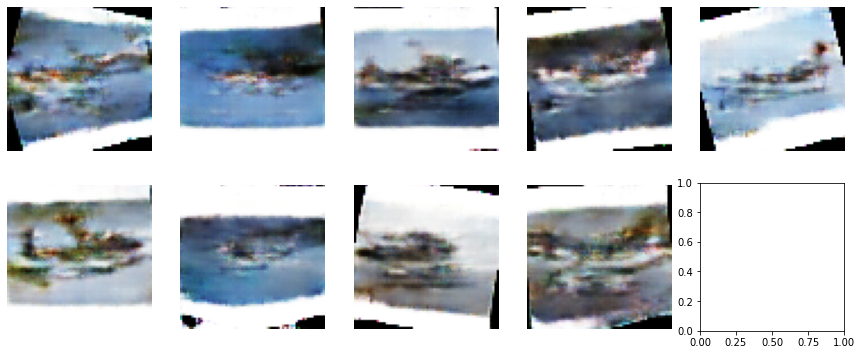

In [ ]:
# Main script
path = "CAPTCHA_DCGAN"  # 이미지가 저장된 폴더
save_path = "sample_images"  # 저장 경로
classes = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]  # 클래스별 폴더 목록 (디렉토리만 필터링)

num_files_per_class = 10  # 각 클래스당 생성할 PNG 파일 수

for class_name in classes:
    combine_images_in_class(path, class_name, num_samples=10, cols=5, save_path=save_path, num_files=num_files_per_class)